|Name:| Tufan Kundu|
|----|----|
|Registration Number:| 24MDT0184|
|Experiment:| 9|
|Course:|Regression Analysis lab|
|Date:|4 April, 2025|

## Objective: Check the stationarity of time series model:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss 
from statsmodels.graphics.tsaplots import plot_acf 

### Loading the time series data

In [4]:
stationary_series = pd.read_csv("daily-total-female-births.csv", header = 0, index_col= 0)
stationary_series.index = pd.to_datetime(stationary_series.index)
series = stationary_series.squeeze() # converts the DataFrame to Series if needed


### Plotting the Original Time series dataset

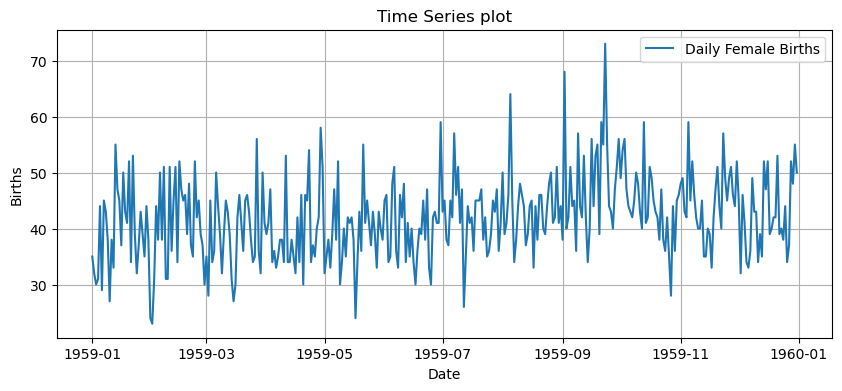

In [5]:
plt.figure(figsize = (10,4))
plt.plot(series, label = "Daily Female Births")
plt.title("Time Series plot")
plt.xlabel("Date")
plt.ylabel("Births")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
### Summary Statistics(Mean, Variance) for Entire Series and Subsets

# Split into 2 equal parts for comparison
split = len(series)//2
first_half = series[:split]
second_half = series[split:]

print("Summary Statistics:")
print(f"Entire Series - Mean: {series.mean():.2f}, Variance: {series.var():.2f}")
print(f"First Half - Mean: {first_half.mean():.2f}, Variance: {first_half.var():.2f}")
print(f"Second Half - Mean: {second_half.mean():.2f}, Variance: {second_half.var():.2f}")

## If the mean and variance are relatively constant, the series might be stationary

Summary Statistics:
Entire Series - Mean: 41.98, Variance: 54.00
First Half - Mean: 39.76, Variance: 49.49
Second Half - Mean: 44.19, Variance: 48.98


### Rolling Statistics ( Mean and Standard Deviation)

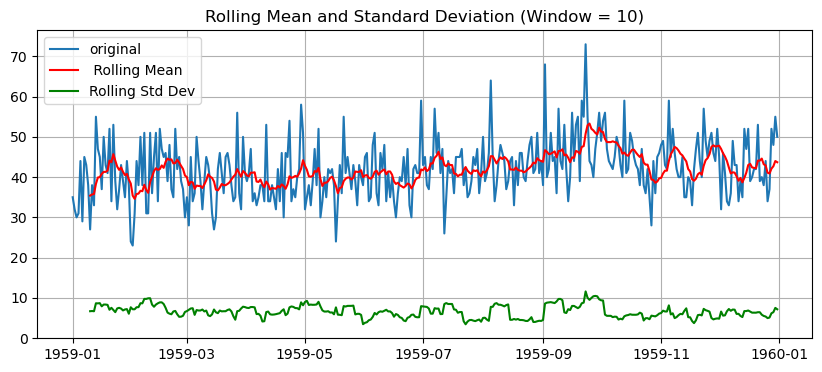

In [ ]:
rolling_mean = series.rolling(window = 10).mean()
rolling_std = series.rolling(window = 10).std()

plt.figure(figsize=(10,4))
plt.plot(series, label = 'original')
plt.plot(rolling_mean, label = ' Rolling Mean', color = 'red')
plt.plot(rolling_std, label = 'Rolling Std Dev', color = 'green')
plt.title("Rolling Mean and Standard Deviation (Window = 10)")
plt.legend()
plt.grid(True)
plt.show()

## Visual check: If rolling mean and std dev stay roughly constant, series is likely stationary.

### Augmented Dickey-Fuller (ADF) Test

## Null hypothesis: Series has a unit root(non - stationary)


In [8]:
adf_result = adfuller(series)

print("\n -- Augmented Dickey Fuller (ADF) Test Results--\n")
## ADF Statistic: Measures stationarity, lower( more negative) values indicate stonger stationarity
print(f"ADF Statistic:{adf_result[0]:.4f}")

# p- value: Determines statistical significance
# If p value < 0.05, reject the null hypothesis (i.e, the series is stationary)
print(f"p-value :{adf_result[1]}")

# Number Of lags used: Shows the number of lagged observations used in the test
print(f"Number of Lags used: {adf_result[2]}")

# Number of Observations Used: The Sample size and used for testing
print(f"Number of observations used: {adf_result[3]}")

# critical values: Thresholds at different confidence levels (1%, 5%, 10%)
print("\nCritical Values for stationarity:")
for key, value in adf_result[4].items():
    print(f"{key}:{value:.4f}")

## Interpretation Based on p-value
if adf_result[1] < 0.05:
    print("The p-value is below 0.05. We reject the null hypothesis.")
    print("Conclusion: The Series is stationary.")
else:
    print("The p-value is above 0.05. We fail to reject the null hypothesis.")
    print("Conclusion: The series is non-stationary.")

## If not stationary apply differencing
if adf_result[1]>0.05:
    print("\nApplying first-order differencing to attempt stationarity...")
    differenced_series = series.diff().dropna()

    ## Run ADF test again on differenced data
    adf_result_diff = adfuller(differenced_series)

    print("\n-- ADF Test After Differencing---")
    print(f"ADF Statistic :{adf_result_diff[0]:.4f}")
    print(f"p-value :{adf_result_diff[1]:.4f}")

    if adf_result_diff[1]<0.05:
        print("After differencing, the series is now stationary.")
    else:
        print("The series is still non-stationary. Consider additional transformations.")

        # A small p-value(<0.05)--> reject null --> data is stationary


 -- Augmented Dickey Fuller (ADF) Test Results--

ADF Statistic:-4.8083
p-value :5.2434129901498554e-05
Number of Lags used: 6
Number of observations used: 358

Critical Values for stationarity:
1%:-3.4487
5%:-2.8696
10%:-2.5711
The p-value is below 0.05. We reject the null hypothesis.
Conclusion: The Series is stationary.


### Autocorrelation Plot(ACF)

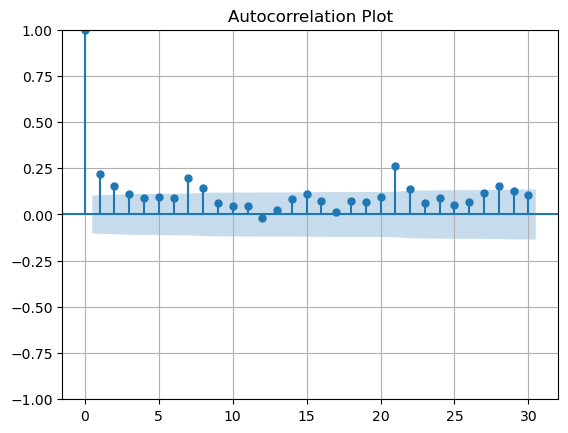

In [9]:
plot_acf(series, lags = 30)
plt.title("Autocorrelation Plot")
plt.grid(True)
plt.show()

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf 


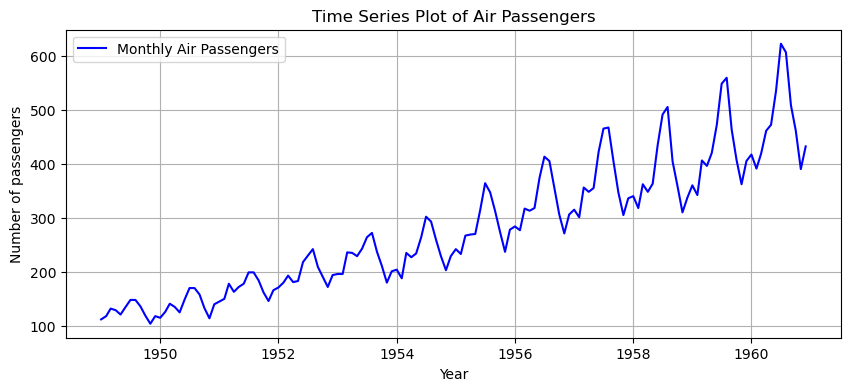

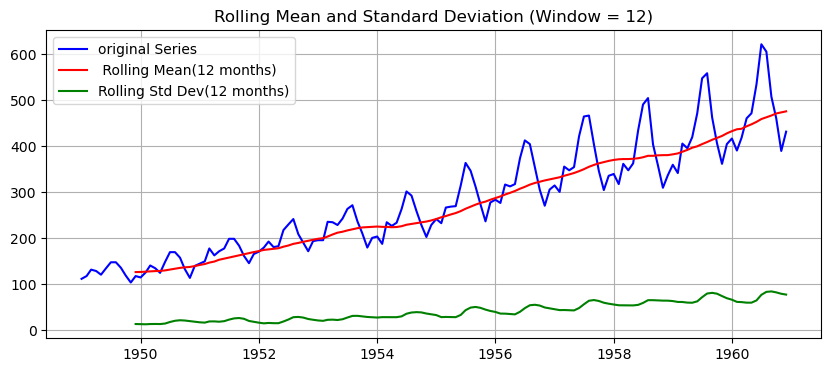


 -- Augmented Dickey Fuller (ADF) Test Results--

ADF Statistic:0.8154
p-value :0.991880243437641
Number of Lags used: 13
Number of observations used: 130

Critical Values for stationarity:
1%:-3.4817
5%:-2.8840
10%:-2.5788
The p-value is above 0.05. We fail to reject the null hypothesis.
Conclusion: The series is non-stationary.

Applying first-order differencing to attempt stationarity...

-- ADF Test After Differencing---
ADF Statistic :-2.8293
p-value :0.0542
The series is still non-stationary. Consider additional transformations.


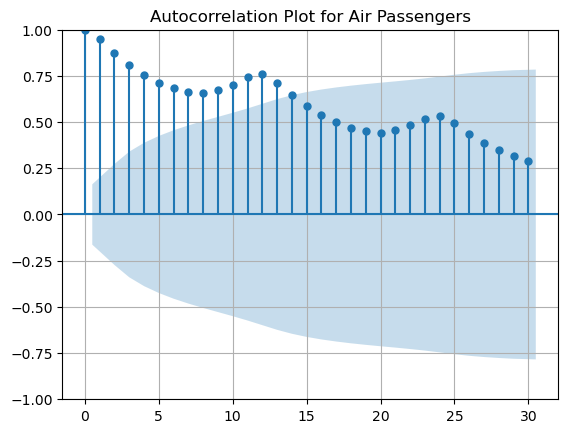

In [11]:
## Loading the Air Passengers Dataset

air_passengers = pd.read_csv('AirPassengers.csv', header = 0, index_col = 0)

## Converting the index to datetime format for proper time series analysis
air_passengers.index = pd.to_datetime(air_passengers.index)

## Converting the DataFrame into a series
series = air_passengers.squeeze()

## Plotting the original Time series

plt.figure(figsize = (10,4))
plt.plot(series, label = 'Monthly Air Passengers', color = 'blue')
plt.title("Time Series Plot of Air Passengers")
plt.xlabel("Year")
plt.ylabel("Number of passengers")
plt.grid(True)
plt.legend()
plt.show()

### Rolling Statistics ( Mean and Standard Deviation)
## Computing rolling mean and rolling standard deviation using a window size of 12 (1 year)
rolling_mean = series.rolling(window = 12).mean()
rolling_std = series.rolling(window = 12).std()

plt.figure(figsize=(10,4))
plt.plot(series, label = 'original Series', color = 'blue')
plt.plot(rolling_mean, label = ' Rolling Mean(12 months)', color = 'red')
plt.plot(rolling_std, label = 'Rolling Std Dev(12 months)', color = 'green')
plt.title("Rolling Mean and Standard Deviation (Window = 12)")
plt.legend()
plt.grid(True)
plt.show()

## Visual check: If rolling mean and std dev stay roughly constant, series is likely stationary.

### Augmented Dickey-Fuller (ADF) Test
## Null hypothesis: Series has a unit root(non - stationary)
adf_result = adfuller(series)

print("\n -- Augmented Dickey Fuller (ADF) Test Results--\n")
## ADF Statistic: Measures stationarity, lower( more negative) values indicate stonger stationarity
print(f"ADF Statistic:{adf_result[0]:.4f}")

# p- value: Determines statistical significance
# If p value < 0.05, reject the null hypothesis (i.e, the series is stationary)
print(f"p-value :{adf_result[1]}")

# Number Of lags used: Shows the number of lagged observations used in the test
print(f"Number of Lags used: {adf_result[2]}")

# Number of Observations Used: The Sample size and used for testing
print(f"Number of observations used: {adf_result[3]}")

# critical values: Thresholds at different confidence levels (1%, 5%, 10%)
print("\nCritical Values for stationarity:")
for key, value in adf_result[4].items():
    print(f"{key}:{value:.4f}")

## Interpretation Based on p-value
if adf_result[1] < 0.05:
    print("The p-value is below 0.05. We reject the null hypothesis.")
    print("Conclusion: The Series is stationary.")
else:
    print("The p-value is above 0.05. We fail to reject the null hypothesis.")
    print("Conclusion: The series is non-stationary.")

## If not stationary apply differencing
if adf_result[1]>0.05:
    print("\nApplying first-order differencing to attempt stationarity...")
    differenced_series = series.diff().dropna()

    ## Run ADF test again on differenced data
    adf_result_diff = adfuller(differenced_series)

    print("\n-- ADF Test After Differencing---")
    print(f"ADF Statistic :{adf_result_diff[0]:.4f}")
    print(f"p-value :{adf_result_diff[1]:.4f}")

    if adf_result_diff[1]<0.05:
        print("After differencing, the series is now stationary.")
    else:
        print("The series is still non-stationary. Consider additional transformations.")

        # A small p-value(<0.05)--> reject null --> data is stationary
## ACF plot
plot_acf(series, lags = 30)
plt.title("Autocorrelation Plot for Air Passengers")
plt.grid(True)
plt.show()

### If autocorrelation decrease slowly, the series is non- stationary

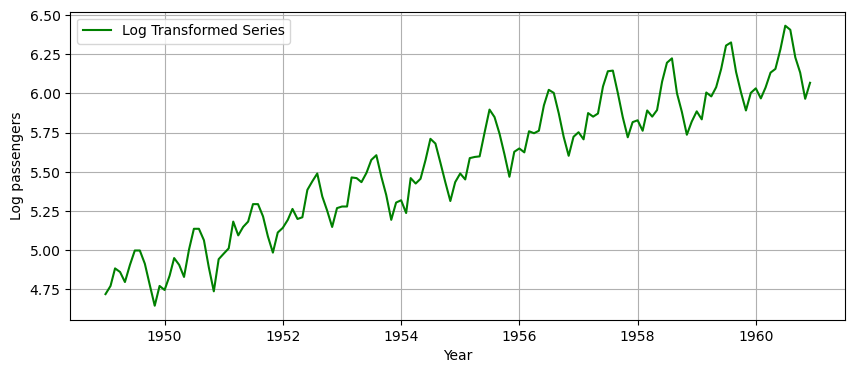

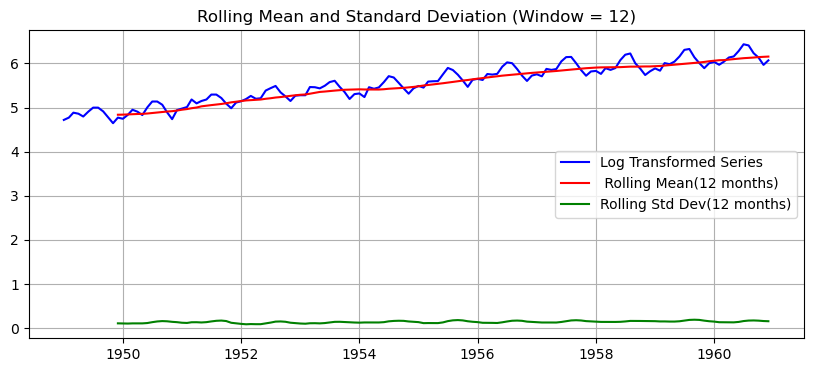


 -- Augmented Dickey Fuller (ADF) Test Results--

ADF Statistic:-1.7170
p-value :0.4223667747703902
Number of Lags used: 13
Number of observations used: 130

Critical Values for stationarity:
1%:-3.4817
5%:-2.8840
10%:-2.5788
The p-value is above 0.05. We fail to reject the null hypothesis.
Conclusion: The Log-Transformed series is non-stationary.


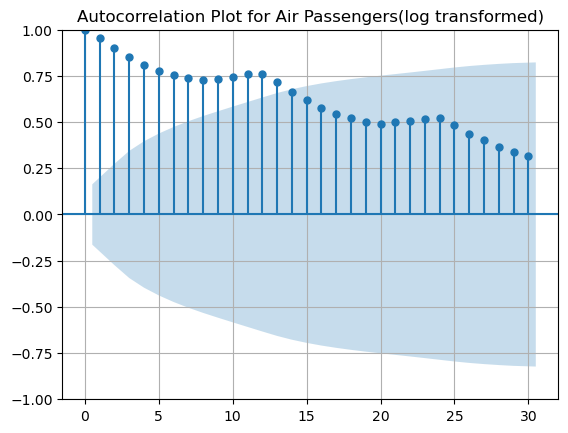


Applying first-order differencing to attempt stationary...


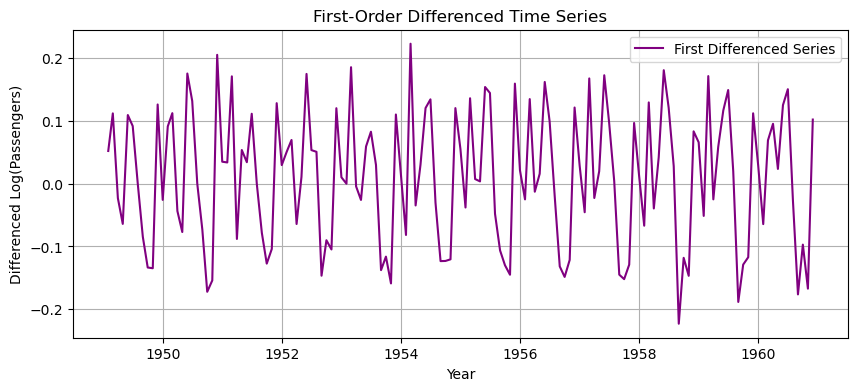


--- ADF Test After Differencing ---
ADF Statistic: -2.7171
p value: 0.0711
The series is still non- stationary. Consider additional transformations.


In [15]:
import numpy as np
### Applying Log Transformation
log_series = np.log(series)

plt.figure(figsize = (10,4))
plt.plot(log_series, label = "Log Transformed Series", color = 'green')
plt.xlabel("Year")
plt.ylabel("Log passengers")
plt.grid(True)
plt.legend()
plt.show()

### Rolling Statistics ( Mean and Standard Deviation)
rolling_mean = log_series.rolling(window = 12).mean()
rolling_std = log_series.rolling(window = 12).std()

plt.figure(figsize=(10,4))
plt.plot(log_series, label = 'Log Transformed Series', color = 'blue')
plt.plot(rolling_mean, label = ' Rolling Mean(12 months)', color = 'red')
plt.plot(rolling_std, label = 'Rolling Std Dev(12 months)', color = 'green')
plt.title("Rolling Mean and Standard Deviation (Window = 12)")
plt.legend()
plt.grid(True)
plt.show()

### Augmented Dickey-Fuller (ADF) Test
## Null hypothesis: Series has a unit root(non - stationary)
adf_result = adfuller(log_series)

print("\n -- Augmented Dickey Fuller (ADF) Test Results--\n")
## ADF Statistic: Measures stationarity, lower( more negative) values indicate stonger stationarity
print(f"ADF Statistic:{adf_result[0]:.4f}")

# p- value: Determines statistical significance
# If p value < 0.05, reject the null hypothesis (i.e, the series is stationary)
print(f"p-value :{adf_result[1]}")

# Number Of lags used: Shows the number of lagged observations used in the test
print(f"Number of Lags used: {adf_result[2]}")

# Number of Observations Used: The Sample size and used for testing
print(f"Number of observations used: {adf_result[3]}")

# critical values: Thresholds at different confidence levels (1%, 5%, 10%)
print("\nCritical Values for stationarity:")
for key, value in adf_result[4].items():
    print(f"{key}:{value:.4f}")

## Interpretation Based on p-value
if adf_result[1] < 0.05:
    print("The p-value is below 0.05. We reject the null hypothesis.")
    print("Conclusion: The Log transformed Series is stationary.")
else:
    print("The p-value is above 0.05. We fail to reject the null hypothesis.")
    print("Conclusion: The Log-Transformed series is non-stationary.")

## ACF plot
plot_acf(log_series, lags = 30)
plt.title("Autocorrelation Plot for Air Passengers(log transformed)")
plt.grid(True)
plt.show()

### First order differencing ( If Non-Stationary)

if adf_result[1] > 0.05:
    print("\nApplying first-order differencing to attempt stationary...")
    diff_series = log_series.diff().dropna()
    
    plt.figure(figsize = (10,4))
    plt.plot(diff_series, label = 'First Differenced Series', color = 'purple')
    plt.title("First-Order Differenced Time Series")
    plt.xlabel("Year")
    plt.ylabel("Differenced Log(Passengers)")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    ## Running adf test again on differenced data
    adf_result_diff = adfuller(diff_series)
    
    print("\n--- ADF Test After Differencing ---")
    print(f"ADF Statistic: {adf_result_diff[0]:.4f}")
    print(f"p value: {adf_result_diff[1]:.4f}")
    if adf_result_diff[1] < 0.05:
        print("After differencing, the series is now stationary")
    else:
        print("The series is still non- stationary. Consider additional transformations.")